<a href="https://colab.research.google.com/github/afranavas/Object_Detection/blob/main/Object_Detection_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Data augmentation to improve generalization
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

In [4]:
# Define the CNN model
model = models.Sequential([
    data_augmentation,  # Applying augmentation during training
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Define EarlyStopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [7]:
# Train the model
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(test_images, test_labels),
                    batch_size=64,
                    callbacks=[early_stopping])


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 105ms/step - accuracy: 0.2954 - loss: 1.8985 - val_accuracy: 0.4757 - val_loss: 1.4174
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 103ms/step - accuracy: 0.4625 - loss: 1.4819 - val_accuracy: 0.5073 - val_loss: 1.3975
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.5110 - loss: 1.3613 - val_accuracy: 0.5567 - val_loss: 1.2675
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.5452 - loss: 1.2748 - val_accuracy: 0.5672 - val_loss: 1.2301
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.5712 - loss: 1.2108 - val_accuracy: 0.6036 - val_loss: 1.1397
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.5904 - loss: 1.1687 - val_accuracy: 0.5861 - val_loss: 1.1861
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 100ms/step - accuracy: 0.5957 - loss: 1.1432 - val_accuracy: 0.6244 - val_loss: 1.0671
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 102ms/step - accuracy: 0.6004 - loss:

313/313 - 6s - 19ms/step - accuracy: 0.6947 - loss: 0.8978
Test accuracy: 0.6947000026702881


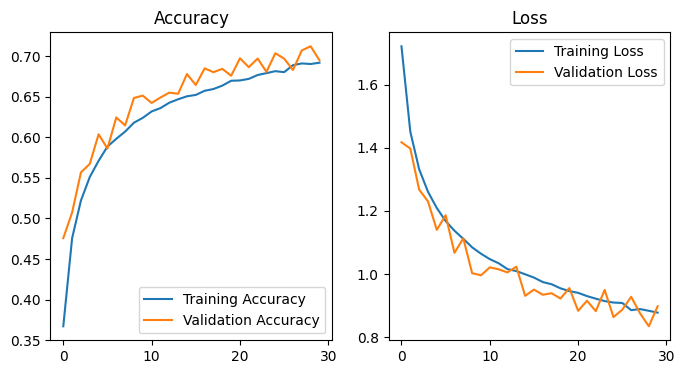

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


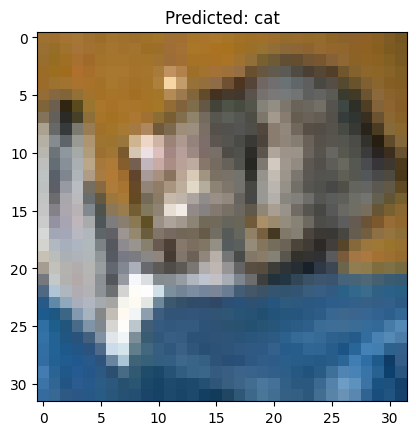

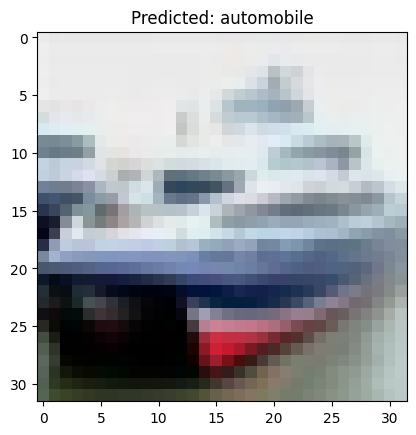

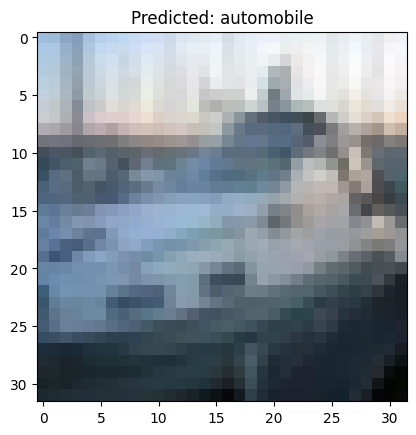

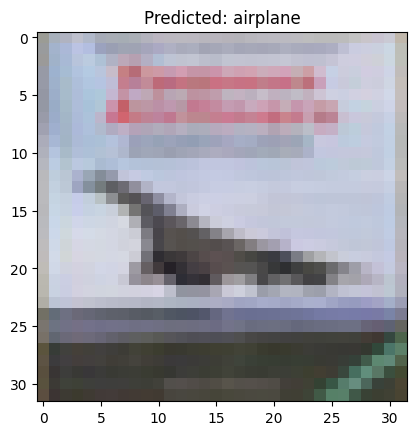

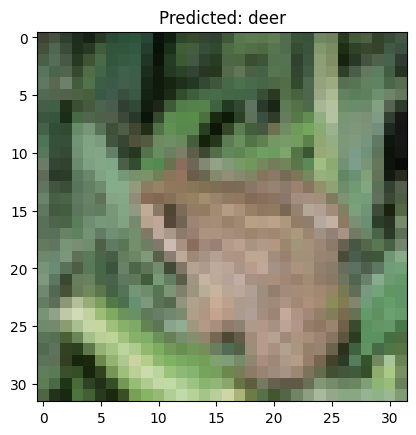

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Predict on new images (Optional)
predictions = model.predict(test_images[:5])
for i, pred in enumerate(predictions):
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {class_names[tf.argmax(pred)]}")
    plt.show()